# 1. File description 

This file is meant to clean and tranform the data already existing to a format that will be used for labelling. Some EDA and feature engineering will be done here but as the data is not labelled, most of it will be done after the labelling.

## 2.1 Modules and UDFs

In [2]:
import src.viz as sv
import src.useful as su


# Data manipulation
import sqlite3
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

# Data vizualisation
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.figure_factory as ff

# For charging bars for for loops and pd.Series.apply()
from tqdm.auto import tqdm
tqdm.pandas()

# To control time
from datetime import datetime, timedelta

# To manupulate emojis
import demoji

# To retrive domain from url 
from urllib.parse import urlparse

# To move files around
import shutil

from IPython.display import Image

### Setting notebook preferences
Setting pandas to not limit the number of displayed columns and open database

In [3]:
pd.set_option("display.max_columns", None)
pio.templates.default = "plotly_dark"

# Creating SQL database to store all the data for the project
database = "data/main_database.sqlite"
con = sqlite3.connect(database)

In [4]:
query = '''
select 
    * 
from sqlite_master'''

df_sqlite_master = pd.read_sql_query('select * from sqlite_master', con)
for tbl in df_sqlite_master['tbl_name']:
    print(tbl, pd.read_sql_query(f'select * from {tbl}', con).shape)

comments (134465, 12)
last_12_posts (363408, 9)
post_ids (7831, 2)
photos (467299, 3)
users (86343, 65)


Now, each table is going to be cleaned and put in a nice format

## 1. Comments

This table contains all the comments collected and each row of the table represent a single comment. It's possible that if a user commented twice on a post, I collected both of the comment or caught the comment of the same users on multiple post.
The goal is to clean the table, and output it in a clean and organized table

In [5]:
query = '''
select 
    * 
from comments
'''

df_comments = pd.read_sql_query(query, con)
pages = list(set(df_comments['page']))
df_comments.query('username in @pages').head()

page       postid  \
28769   meme.ig  CYqmMFalyy3   
47029    pubity  CX6DpVTJpHD   
50530   meme.ig  CXcWFcFDU-q   
77484   meme.ig  CYti5wkBv1n   
112710  meme.ig  CXuW7-7jFEq   

                                                   legend       post_likes  \
28769   meme.igY’all gotta follow @lolpickupliness & @...     90,649 likes   
47029       pubityMade his year 🥺❤️-(Via @contentbible)3w  1,162,392 likes   
50530   mindblowin.g@MEME.IG @HOTDOGS really the best ...    228,433 likes   
77484     pubertyhit.severy boy needs to see this video4d    254,029 likes   
112710            mindblowin.gBruh 😭💀 @MEME.IG @HOTDOGS4w    754,794 likes   

                post_posted_time username  \
28769   2022-01-13T09:41:09.000Z  meme.ig   
47029   2021-12-25T13:16:12.000Z   pubity   
50530   2021-12-14T00:19:47.000Z  meme.ig   
77484   2022-01-14T13:10:12.000Z  meme.ig   
112710  2021-12-21T00:13:59.000Z  meme.ig   

                                        full_comment_data  \
28769   meme.igMy soul left my body I felt blank for a...   
47029   pubityIt is both his birthday and Christmas bt...   
50530   meme.igHomie just kept goin5w3,879 likesReplyV...   
77484   meme.igClassic fit4d2,151 likesReplyView repli...   
112710  meme.igHe’s a runner he’s a track star4w18,392...   

                                               comment  \
28769   My soul left my body I felt blank for a minute   
47029     It is both his birthday and Christmas btw 🎉🎄   
50530                             Homie just kept goin   
77484                                      Classic fit   
112710                 He’s a runner he’s a track star   

             comment_posted_time comments_likes  comment_comments_count  \
28769   2022-01-13T09:47:38.000Z      944 likes                       4   
47029   2021-12-25T13:32:15.000Z   17,624 likes                     104   
50530   2021-12-14T00:20:23.000Z    3,879 likes                       1   
77484   2022-01-14T13:11:16.000Z    2,151 likes                       2   
112710  2021-12-21T00:18:53.000Z   18,392 likes                      24   

               data_collected_time  
28769   2022-01-18 04:03:51.359886  
47029   2022-01-18 20:10:51.468783  
50530   2022-01-18 05:54:42.541059  
77484   2022-01-19 03:18:24.106187  
112710  2022-01-18 16:56:53.158904

In [6]:
df_comments.describe(include='all').round()

page       postid  \
count   134465       134465   
unique      24         5614   
top        nfl  CYh6UW-IWUc   
freq      9544           80   
mean       NaN          NaN   
std        NaN          NaN   
min        NaN          NaN   
25%        NaN          NaN   
50%        NaN          NaN   
75%        NaN          NaN   
max        NaN          NaN   

                                                   legend     post_likes  \
count                                              134465         134465   
unique                                               5593           5579   
top     slamVerifiedThis is a shout out to one of our ...  231,598 likes   
freq                                                   80            120   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

                post_posted_time         username   full_comment_data comment  \
count                     134465           134465              134465  134465   
unique                      5605            88608              133776  119362   
top     2022-01-10T00:44:01.000Z  slimjimVerified  chris_lio7🔥7wReply     🔥🔥🔥   
freq                         104              316                   7     234   
mean                         NaN              NaN                 NaN     NaN   
std                          NaN              NaN                 NaN     NaN   
min                          NaN              NaN                 NaN     NaN   
25%                          NaN              NaN                 NaN     NaN   
50%                          NaN              NaN                 NaN     NaN   
75%                          NaN              NaN                 NaN     NaN   
max                          NaN              NaN                 NaN     NaN   

             comment_posted_time comments_likes  comment_comments_count  \
count                     134465         134465                134465.0   
unique                    124263           7610                     NaN   
top     2022-01-02T18:24:58.000Z          Reply                     NaN   
freq                          10          16003                     NaN   
mean                         NaN            NaN                     7.0   
std                          NaN            NaN                    22.0   
min                          NaN            NaN                     0.0   
25%                          NaN            NaN                     0.0   
50%                          NaN            NaN                     1.0   
75%                          NaN            NaN                     7.0   
max                          NaN            NaN                  2543.0   

               data_collected_time  
count                       134465  
unique                      134465  
top     2022-01-17 02:18:25.197544  
freq                             1  
mean                           NaN  
std                            NaN  
min                            NaN  
25%                            NaN  
50%                            NaN  
75%                            NaN  
max                            NaN

In [7]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134465 entries, 0 to 134464
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   page                    134465 non-null  object
 1   postid                  134465 non-null  object
 2   legend                  134465 non-null  object
 3   post_likes              134465 non-null  object
 4   post_posted_time        134465 non-null  object
 5   username                134465 non-null  object
 6   full_comment_data       134465 non-null  object
 7   comment                 134465 non-null  object
 8   comment_posted_time     134465 non-null  object
 9   comments_likes          134465 non-null  object
 10  comment_comments_count  134465 non-null  int64 
 11  data_collected_time     134465 non-null  object
dtypes: int64(1), object(11)
memory usage: 12.3+ MB


Luckily no duplicates, some columns as likes and comment likes need to be integers, others as the dates need to me in a date format.

* There are 134.465 rows of data, meaning the same number of comments
* Total of 88608 users meaning an average of 1.5 comment per user
* Post likes and comment need the numbers to be extracted and columns changed to integer 
* The three date columns don't have a correct type
* Some columns names are not explicit enough, might need to change them
* Some columns are irrelevant to this analysis. For example, the legend of the post will have no effect on the bot/non bot user so there is no point of keeping them
* No missing values! :emoji_dab:

### 1.1 Removing irrelevant columns & column names

I collected too much data, some columns are irrelevant to the analysis or the model develoment as the page, postid, post_likes and others are independant from the bots.

In [8]:
df_comments = df_comments.rename({'legend': 'caption',
                                  'comments_likes': 'comment_likes',
                                  'comment_comments_count': 'comment_reply_count'}, axis=1)

df_comments.columns

Index(['page', 'postid', 'caption', 'post_likes', 'post_posted_time',
       'username', 'full_comment_data', 'comment', 'comment_posted_time',
       'comment_likes', 'comment_reply_count', 'data_collected_time'],
      dtype='object')

In [9]:
pages = list(set(df_comments['page']))

# Dropping irrelevant columns and changing the columns order
df_comments = df_comments[["username", "comment", "comment_likes", "comment_posted_time", "post_posted_time", 'page']]

df_comments.head(0)

Empty DataFrame
Columns: [username, comment, comment_likes, comment_posted_time, post_posted_time, page]
Index: []

### 1.2 Verified usernames  

When collecting the data, I didn't see that when colelcting the username of the verified users, I was also adding 'Verified' to it as it was probably in the html and didn't see.

In [10]:
print('Number accounts finishing by Verified')
df_comments.query('username.str.endswith("Verified")')['username'].unique().shape

Number accounts finishing by Verified


(1642,)

In [11]:
# Creating Verified flag
df_comments['verified_user'] = df_comments['username'].apply(lambda x: 1 if 'Verified' in x else 0)

# Replacing Verified by nothing. all usernames are lower so no need to be worried of replacing user named Verified
df_comments['username'] = df_comments['username'].apply(lambda x: x[:-8] if x[-8:]=="Verified" else x)

print('Number accounts finishing by Verified')
df_comments.query('username.str.endswith("Verified")')['username'].unique().shape

Number accounts finishing by Verified


(0,)

In [12]:
df_comments.query('username in @pages').head()

username                                            comment  \
8        bleacherreport                  Bucks are up 39 on the Warriors 😳   
180   houseofhighlights                                                  💯   
253                slam                                📷: @atibaphotoReply   
1397                nfl  Catch the full interview between @williemcgine...   
4409         brgridiron  How Jalen responded to this says a lot about h...   

     comment_likes       comment_posted_time          post_posted_time  \
8      2,489 likes  2022-01-14T01:41:56.000Z  2022-01-14T01:41:02.000Z   
180      428 likes  2022-01-12T16:52:53.000Z  2022-01-12T16:46:08.000Z   
253         1 like  2021-12-02T18:04:41.000Z  2021-12-02T17:59:48.000Z   
1397     346 likes  2022-01-14T20:31:48.000Z  2022-01-14T20:30:43.000Z   
4409  17,883 likes  2022-01-03T15:07:28.000Z  2022-01-03T14:48:26.000Z   

                page  verified_user  
8     bleacherreport              1  
180   bleacherreport              1  
253             slam              1  
1397      nflnetwork              1  
4409  bleacherreport              1

### 1.2 Posted time

Both posted time columns don't have the proper datatype, they need to be datetime. Itself it doesn't help much but I can subtract both date and know how many seconds after the post has been posted, the comment has been too. 

In [13]:
# Changing column to datetime & adding time difference
df_comments["post_posted_time"] = pd.to_datetime(df_comments["post_posted_time"])
df_comments["comment_posted_time"] = pd.to_datetime(df_comments["comment_posted_time"])

# The only useful thing I can get from the datetime columns is the time difference so I'll get it and say adios to both
df_comments["time_difference"] = (df_comments["comment_posted_time"] - df_comments["post_posted_time"]).dt.seconds
df_comments = df_comments.drop(["comment_posted_time", "post_posted_time"], axis=1)

df_comments.query('username in @pages').head()

username                                            comment  \
8        bleacherreport                  Bucks are up 39 on the Warriors 😳   
180   houseofhighlights                                                  💯   
253                slam                                📷: @atibaphotoReply   
1397                nfl  Catch the full interview between @williemcgine...   
4409         brgridiron  How Jalen responded to this says a lot about h...   

     comment_likes            page  verified_user  time_difference  
8      2,489 likes  bleacherreport              1               54  
180      428 likes  bleacherreport              1              405  
253         1 like            slam              1              293  
1397     346 likes      nflnetwork              1               65  
4409  17,883 likes  bleacherreport              1             1142

In [14]:
df_comments['time_difference'].describe().round().to_frame()

time_difference
count         134465.0
mean            3293.0
std            11381.0
min                3.0
25%               70.0
50%              194.0
75%              597.0
max            86394.0

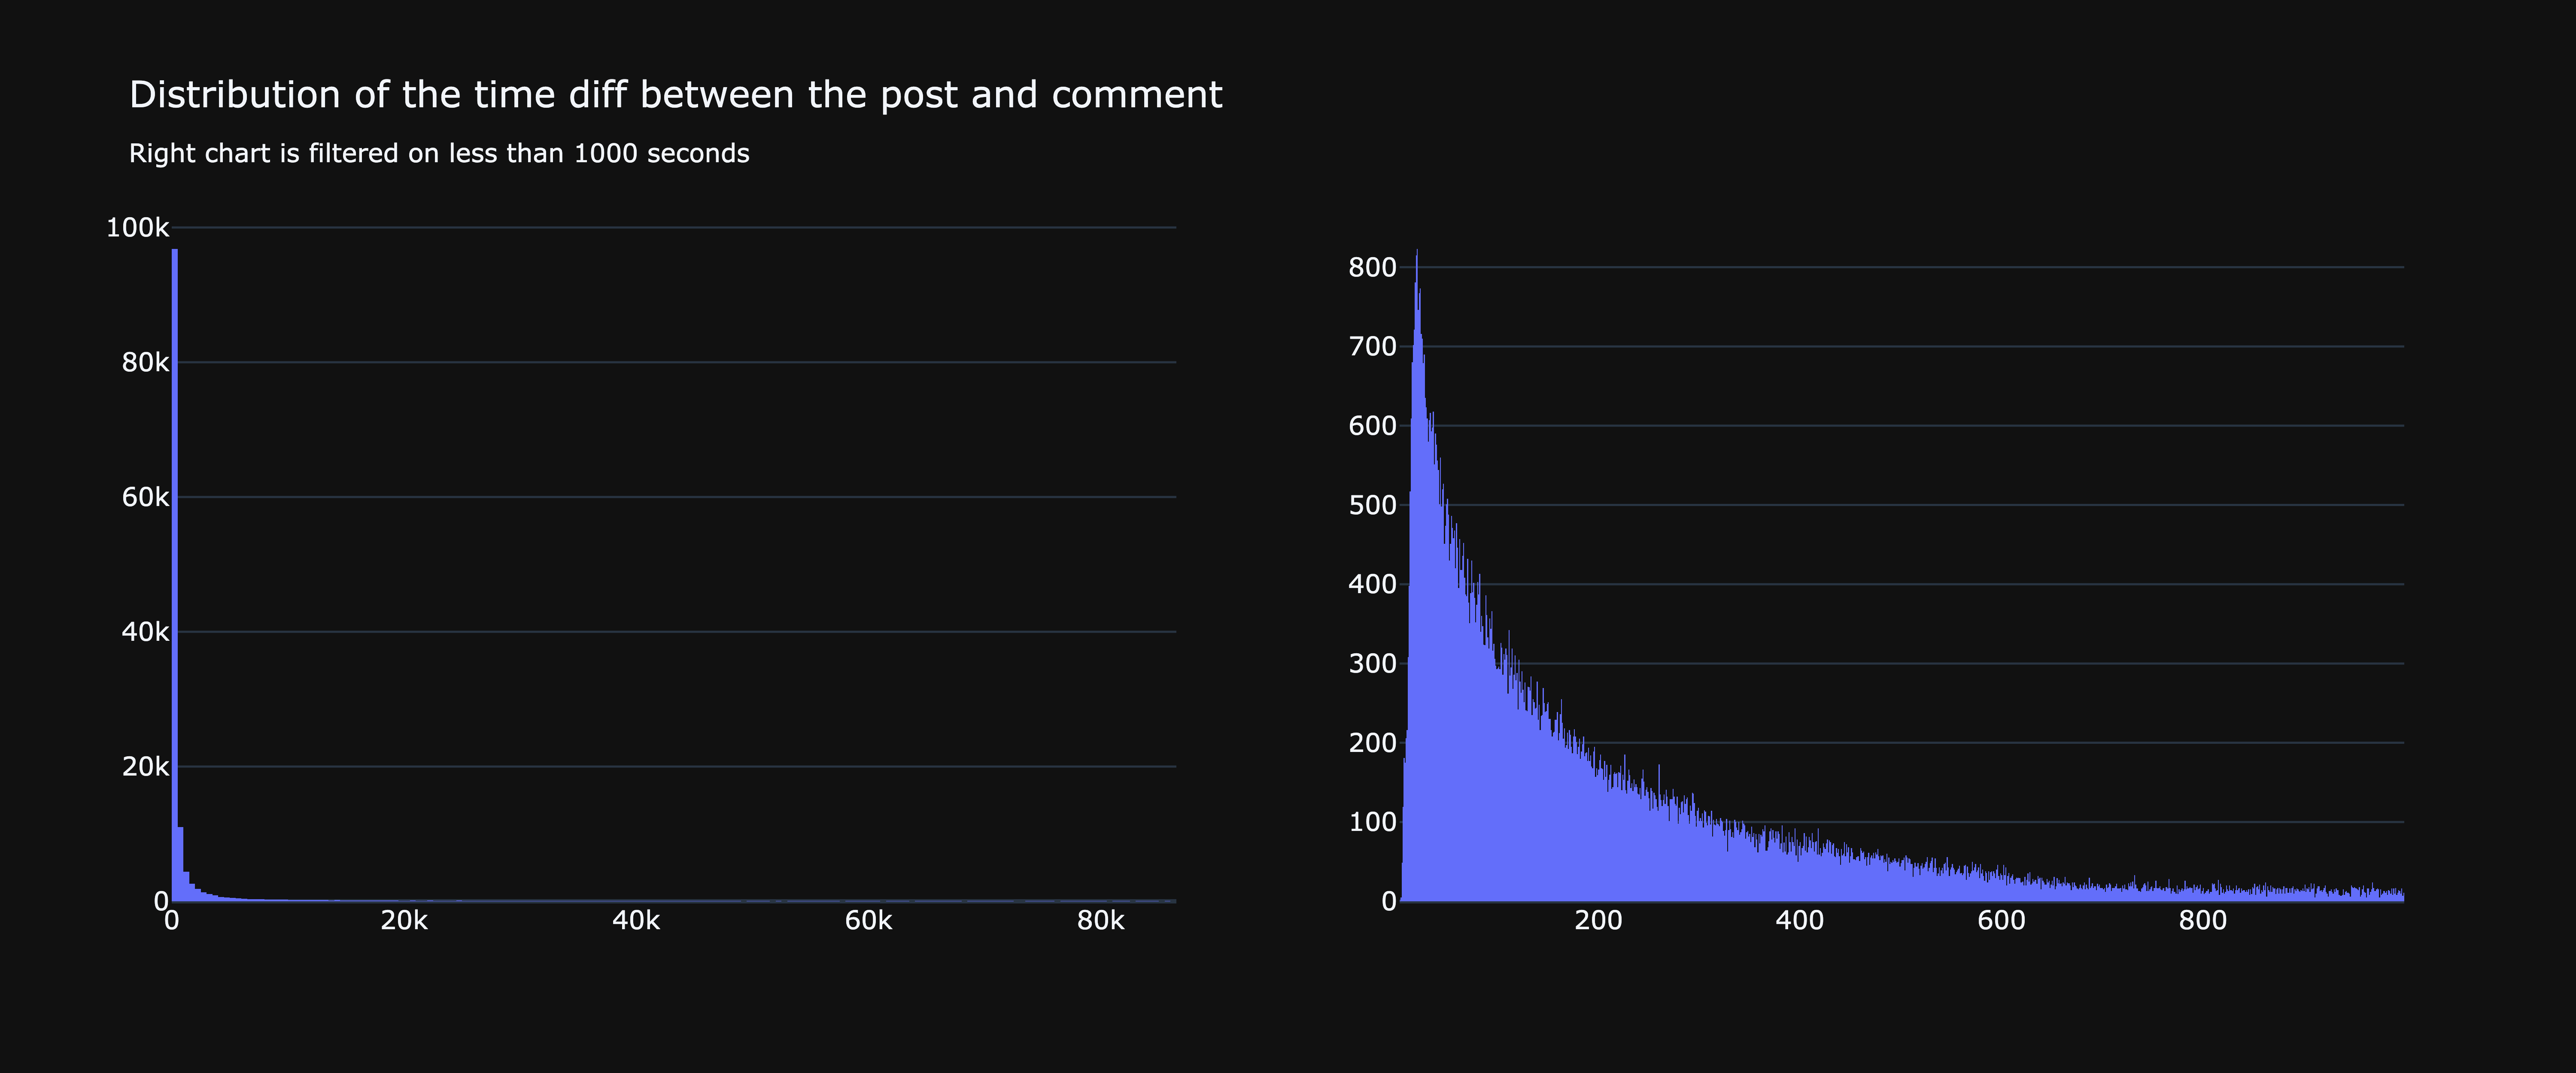

In [15]:
# Show distribution of the comments and the time difference
fig1 = px.histogram(df_comments, 
                    x = 'time_difference')
                    
fig2 = px.histogram(df_comments.query('time_difference < 1000'), 
                    x = 'time_difference', 
                    nbins = 1000)

# Join figures
fig_join = sv.join_plots([fig1, fig2],
                         title='Distribution of the time diff between the post and comment',
                         subtitle='Right chart is filtered on less than 1000 seconds')

# Save chart
file_name = 'Distribution of the time diff between the post and comment - Dual Histogram lt 1000'
sv.save_plotly(fig_join, file_name, 'image')

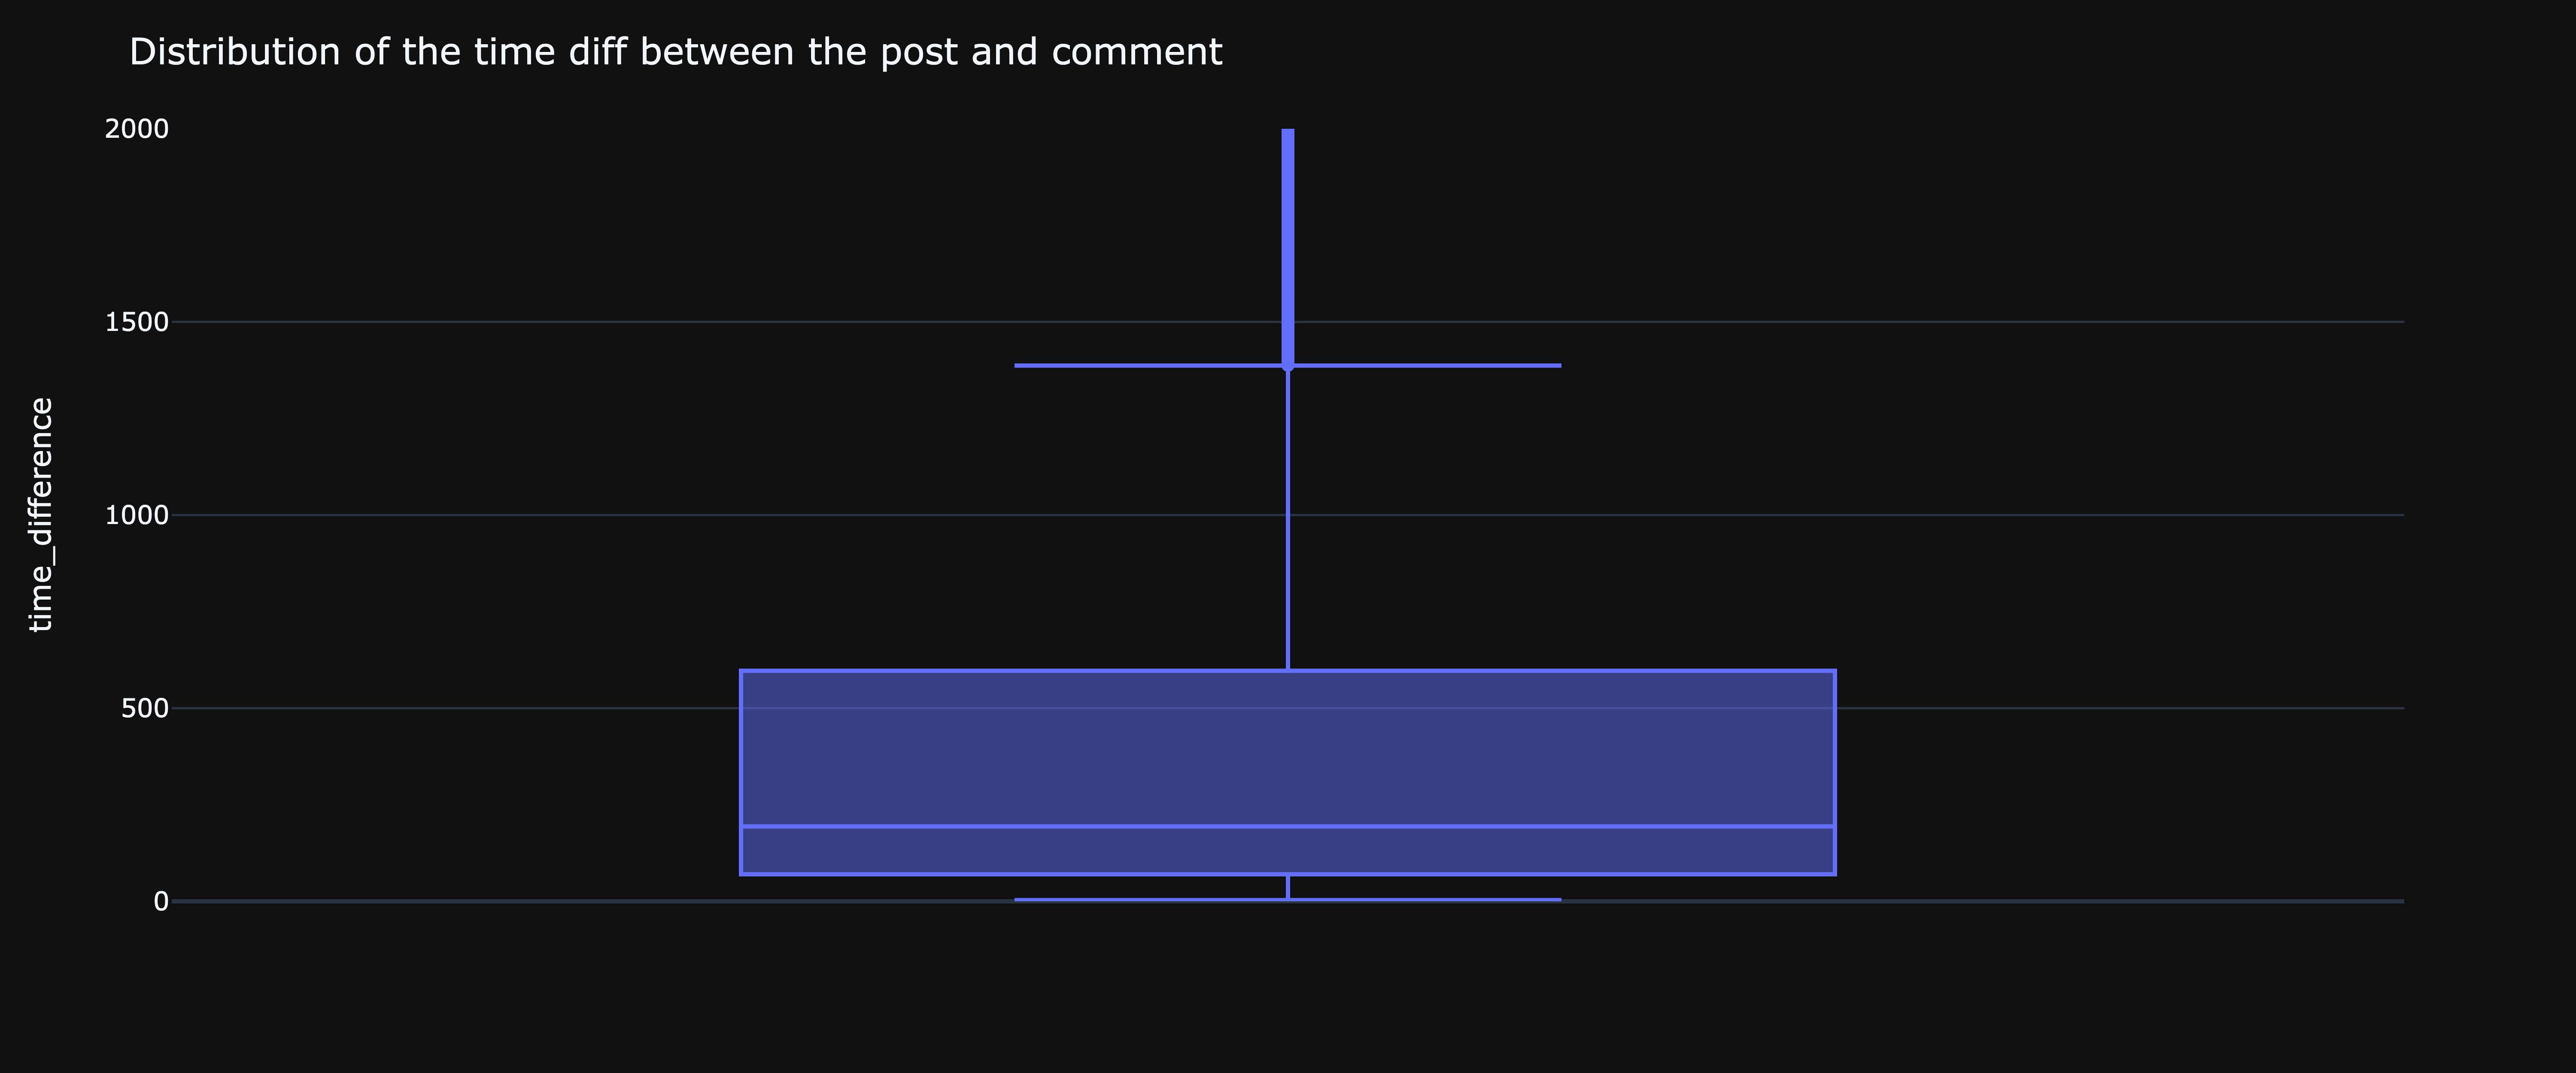

In [16]:
# Create box plot 
fig = px.box(df_comments, y="time_difference")
fig.update_layout(yaxis_range=(0, 2000), # Don't show the chart above 1000 seconds
                  title="Distribution of the time diff between the post and comment")


# Save chart
file_name = 'Distribution of the time diff between the post and comment - Dual Histogram lt 500'
sv.save_plotly(fig, file_name, 'image')

Most of the commetn collected, 75% have been posted in the first 10 minutes after the post has been posted. The median is a third of that, half of the comments were posted in the first three minutes. The peak of the most comments posted at the same time happends 19-20 seconds after the post is published. Once the users are labelled, it'll be interesting to see the difference in that 0-20 seconds window to see the ratio of bots compared to later. 

### 1.3 Comment likes
The like columns is string containing the number of likes formated with thousand commas followed by 'Likes'. The column should be and ineger without any character being non numeric

In [17]:
print('With likes')
display(df_comments['comment_likes'].head())
print('Without likes')
df_comments.query('comment_likes.str.contains("like")==False')['comment_likes'].head()

With likes


0    2,234 likes
1    3,011 likes
2      967 likes
3    1,024 likes
4      966 likes
Name: comment_likes, dtype: object

Without likes


23     Reply
104    Reply
107    Reply
176    Reply
178    Reply
Name: comment_likes, dtype: object

In [18]:
# Replacing 'Reply' by '0' and then extracting all numbers from the strings
df_comments.loc[df_comments['comment_likes']=='Reply', 'comment_likes'] = '0'
df_comments['comment_likes'] = df_comments['comment_likes'].str.replace('\D+', '', regex=True).astype(int)

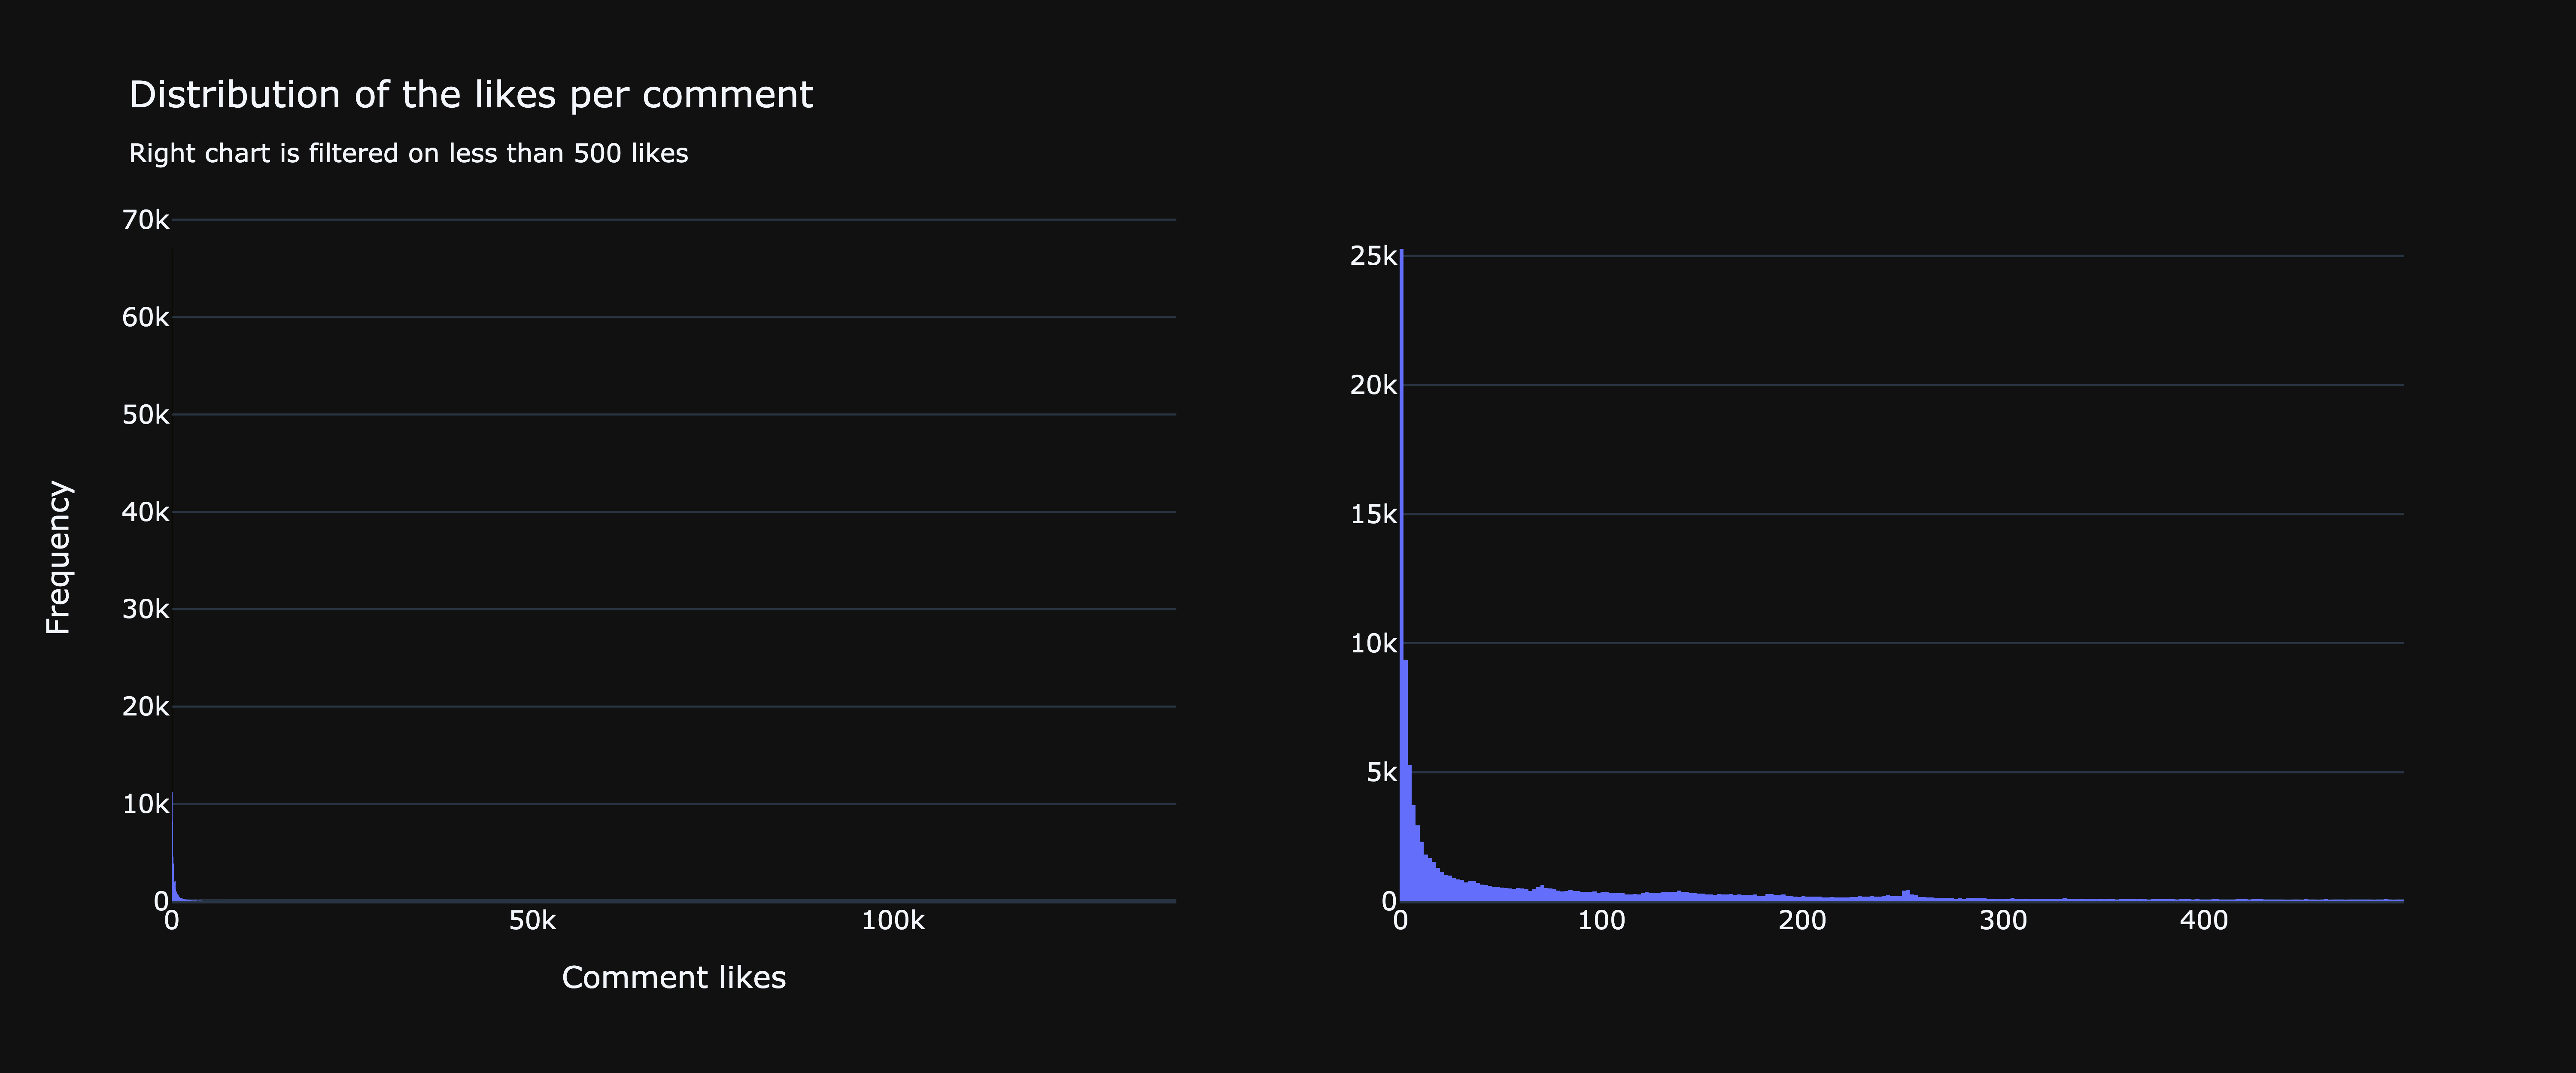

In [19]:
# Show distribution of the comments and the time difference
fig1 = px.histogram(df_comments, 
                    x = 'comment_likes')
                    
fig2 = px.histogram(df_comments.query('comment_likes < 500'), 
                    x = 'comment_likes', 
                    nbins = 400)


fig_join = sv.join_plots([fig1, fig2],
                         title='Distribution of the likes per comment',
                         subtitle='Right chart is filtered on less than 500 likes')

# Update axis names
fig_join.update_layout(xaxis_title="Comment likes",
                       yaxis_title="Frequency")

# Save chart
file_name = 'Distribution of the likes per comment - Dual Histogram lt 500'
sv.save_plotly(fig_join, file_name, 'image')

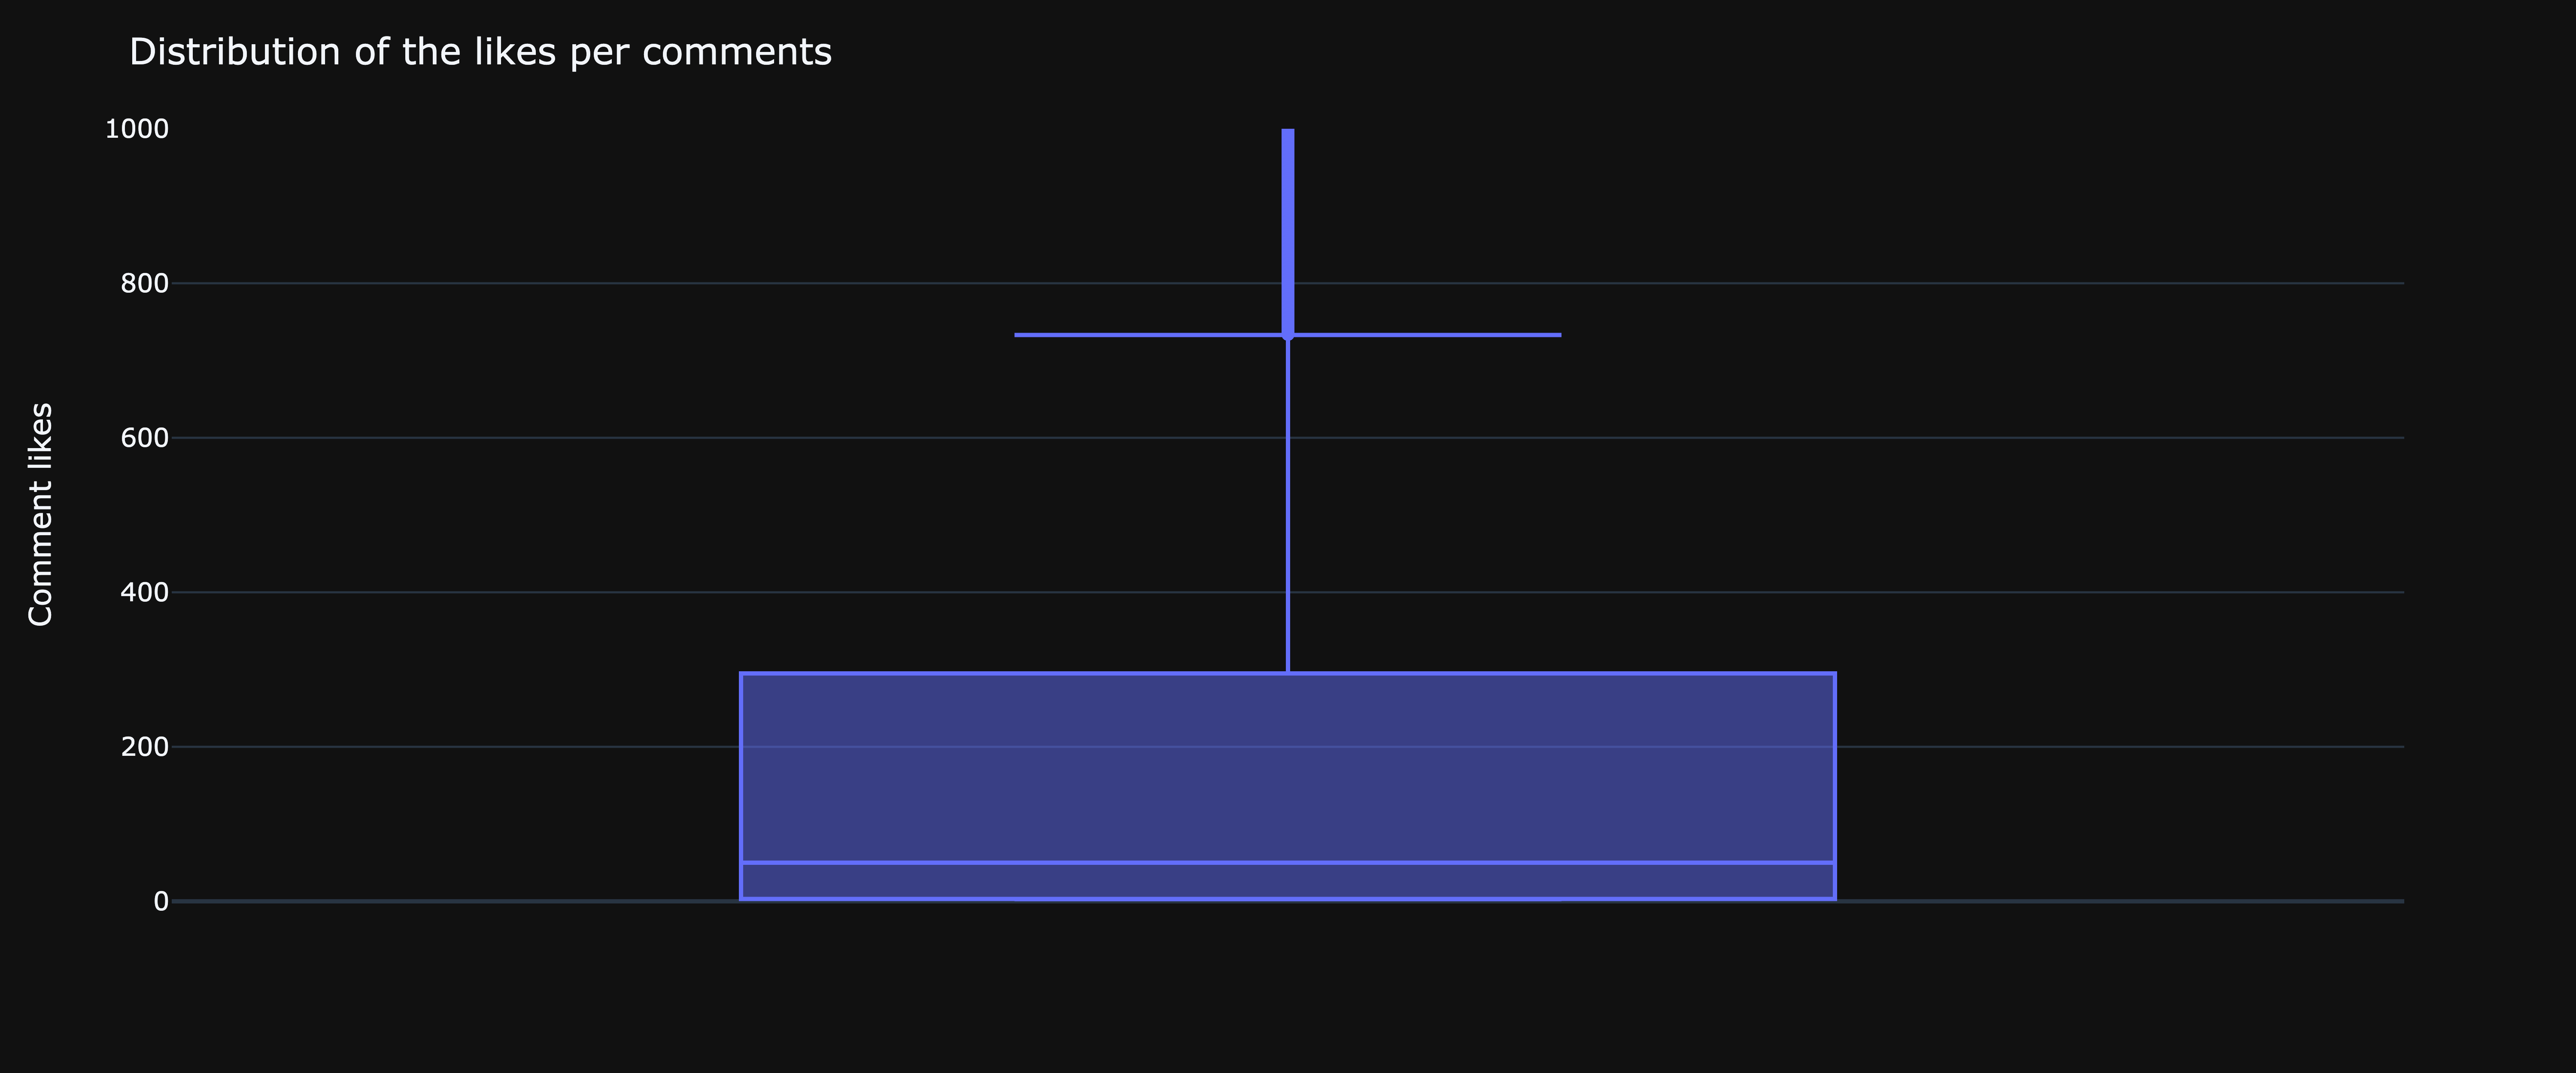

In [20]:
# Create box plot 
fig = px.box(df_comments, 
             y="comment_likes")

fig.update_layout(title='Distribution of the likes per comments', 
                  yaxis_range=(0, 1000), # Don't show the chart above 1000 seconds
                  yaxis_title="Comment likes") 


# Save chart
file_name = 'Distribution of the likes per comment - box plot'
sv.save_plotly(fig, file_name, 'image')

75% of the comments have less than 295 likes with half less than 50 likes. Let's look at the relationship with likes and how it varies depending on when the comment has been posted. 

In [21]:
# The user table is not yet clean but I can still get the follower count of all users
query = '''
select 
    distinct 
    username
    , edge_followed_by_count as follower_count
from users
'''

df_users_follow_count = pd.read_sql_query(query, con)

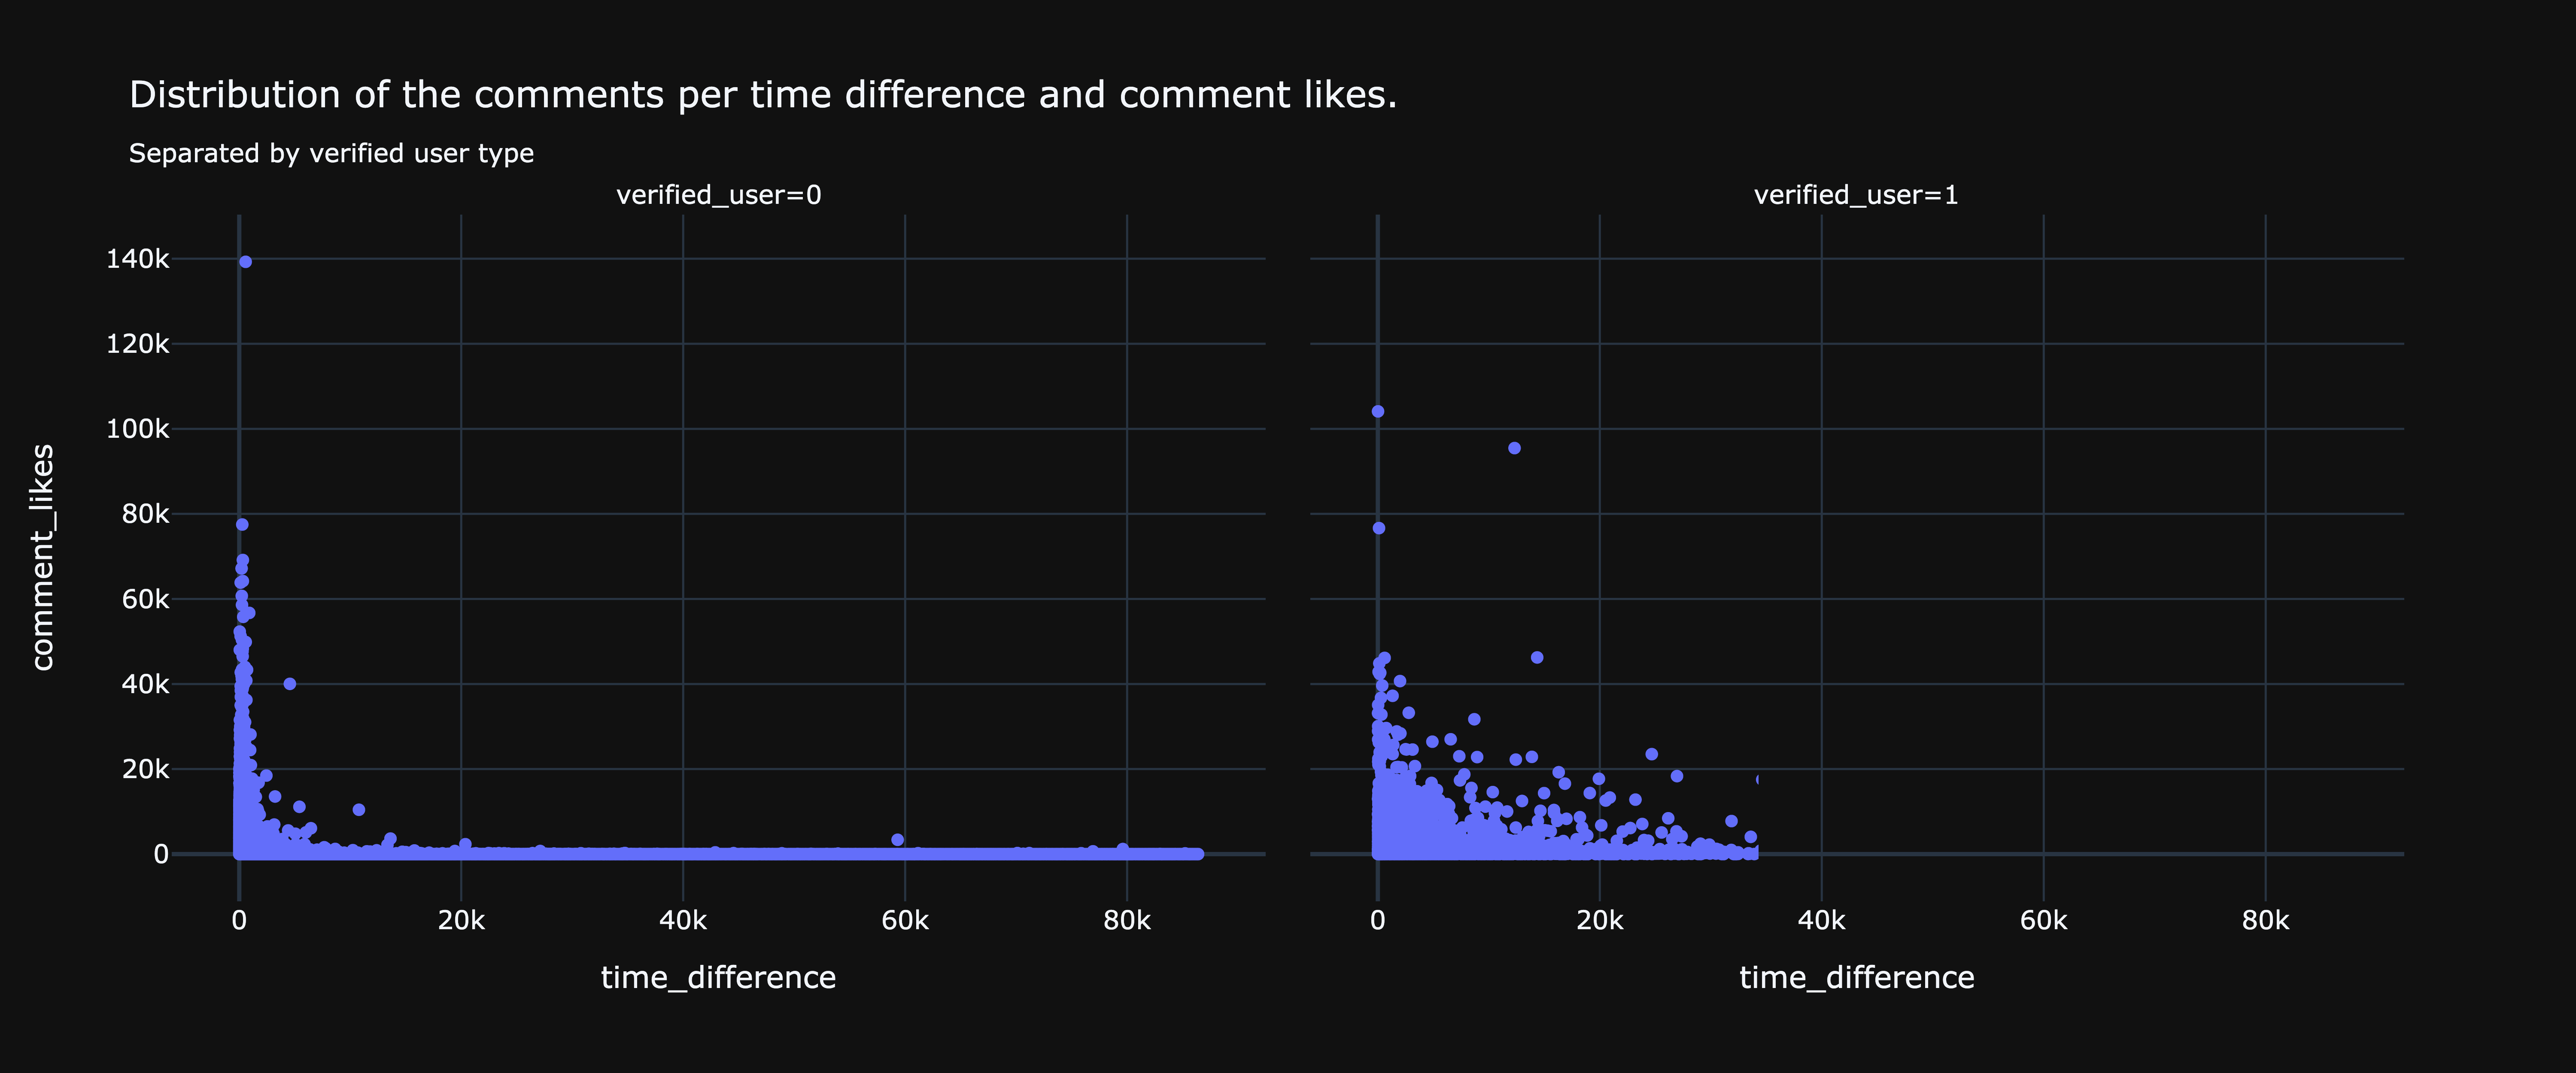

In [22]:
fig = px.scatter(df_comments, 
                 x='time_difference', 
                 y='comment_likes', 
                 facet_col='verified_user',
                 title = 'Distribution of the comments per time difference and comment likes.<br><sub>Separated by verified user type')


# Export
file_name = 'Time difference vs comment likes - Dual scatter verified users'
sv.save_plotly(fig, file_name, 'image')

There is a general trend, the more time after the post is posted you comment, the less likes you will have. This is because there are already a bunch of poeple that have seen the post before the late comment so less potential like count. Except in rare situations, this is always the case for non verified users, they always have low likes if they don't comment at the beginning. For verified users, it's not the same as they ahave their followers naturally liking their comment or the page owner commenting on its own post. It'll be interesting to see how the distribution changes for bots/legit users.

### 1.4 Comment content

* While scraping the comments, I also collect the button name right under and collected in some comments 'Hide replies' and 'Reply'.
* Emojis: 

In [23]:
df_comments.query('comment.str.contains("Hide replies|Reply") and username in @pages').head()

username                                            comment  \
253          slam                                📷: @atibaphotoReply   
12326  brgridiron  Enjoy watching him while we can. Watch his ent...   
12916        slam                                 🎥: @nbaonespnReply   
14672     espnnfl                       Man did a full plank 😮😂Reply   
15413    br_hoops  Final Score: Sierra Canyon 8️⃣3️⃣ Venice 4️⃣9️...   

       comment_likes        page  verified_user  time_difference  
253                1        slam              1              293  
12326            214  brgridiron              1              137  
12916              2        slam              1               25  
14672           2176        ESPN              1              167  
15413              2    br_hoops              1               78

In [24]:
# Removing hide replies and reply from the comment
df_comments["comment"] = df_comments["comment"].apply(lambda x: x[:-12] if x[-12:]=="Hide replies" else x)
df_comments["comment"] = df_comments["comment"].apply(lambda x: x[:-5] if x[-5:]=="Reply" else x)

In [25]:
df_comments.query('comment.str.contains("Hide replies|Reply")')

Empty DataFrame
Columns: [username, comment, comment_likes, page, verified_user, time_difference]
Index: []

In [26]:
# # Adding a column with emoji count of the comments
# df_comments["emoji_dict"] = df_comments["comment"].progress_apply(lambda x: su.count_emoji(x))

# # Adding the count of distinct emoji and the count of emojis in total
# df_comments["emoji_count"] = df_comments["emoji_dict"].apply(lambda x: sum(x.values()))
# df_comments["emoji_count_distinct"] = df_comments["emoji_dict"].apply(lambda x: len(x.keys()))

# # Removing emoji from comments
# df_comments["comment_woemoji"] = df_comments["comment"].progress_apply(lambda x: demoji.replace(x, "").strip())

# # Adding a columns containing all emojis
# df_comments["emoji"] = df_comments["emoji_dict"].apply(lambda x: list(x.keys()))

# df_comments.head()

In [27]:
# # top 20 most used emojis
# all_emojis = ''

# for emoji_dict in df_comments['emoji_dict']:
#     for key, value in emoji_dict.items():
#         for _ in range(value):
#             all_emojis += key


# sorted_emojis = sorted({emoji: all_emojis.count(emoji) for emoji in set(all_emojis)}.items(), key=lambda x: x[1], reverse=True)
# sorted_emojis

In [28]:
# rows = 5
# cols = 20

# lst = [['' for _ in range(rows)] for _ in range(cols)]


# for index1 in range(rows):
#     for index2 in range(cols):
#         ind = index1 * cols + index2 + 1
#         emoji, count = sorted_emojis[ind - 1]
#         lst[index2][index1] = f'{ind}: {emoji} - {count} \t'

# print('Top 100 most used emojis\n')
# print(''.join([''.join([''.join(ls)]) + '\n' for ls in lst]))

In [29]:
# # This is to try to plot likes and emoji like top 10 emoji by bracket of likes


# lst = []

# for row in range(len(df_comments)):
#     comment_likes = df_comments.loc[row, 'comment_likes']
#     emoji_dict = df_comments.loc[row, 'emoji_dict']

# #     emoji_dict = {'😂': 4, '🤦🏾‍♂️': 3}
#     if emoji_dict == {}:
#         continue

#     # print(emoji_dict)
# #     emoji_dict = {key: [value] for key, value in emoji_dict.items()}


#     for key, value in emoji_dict.items():
#         for _ in range(value):
#             lst.append([key, comment_likes])

# #     df_emoji = pd.DataFrame(emoji_dict).T.reset_index()
# #     df_emoji.columns = ['emoji', 'count']

# #     for row in df_emoji.index: 
# #         df.loc[len(df)] = [df_emoji.iloc[row, 0], comment_likes]



# # df

# # # df.append([df_emoji]*5,ignore_index=True)
# df = pd.DataFrame(lst, columns=['emoji', 'likes'])
# df

In [30]:
# df['bin'] = pd.cut(df['likes'], list(range(0, max(df['likes']), 100)))

In [31]:
# df = df.groupby(['bin'], as_index=False).agg({'emoji': ''.join})
# df['emoji_count'] = df['emoji'].apply(lambda x: sorted({emoji: x.count(emoji) for emoji in set(x)}.items(), key=lambda x: x[1], reverse=True))
# df['emoji'] = df['emoji'].apply(lambda x: ''.join(set(x)))

# df.head(20)

## 2. Last 12 posts



In [32]:
query = '''
select 
    * 
from last_12_posts
'''

df_last12 = pd.read_sql_query(query, con)
df_last12.query('username in @pages').head()

username  video_views  \
59449   pubity     285266.0   
59450   pubity          NaN   
59451   pubity          NaN   
59452   pubity    3127494.0   
59453   pubity    5009973.0   

                                             display_url  \
59449  https://scontent-lga3-2.cdninstagram.com/v/t51...   
59450  https://scontent-lga3-2.cdninstagram.com/v/t51...   
59451  https://scontent-lga3-2.cdninstagram.com/v/t51...   
59452  https://scontent-lga3-2.cdninstagram.com/v/t51...   
59453  https://scontent-lga3-2.cdninstagram.com/v/t51...   

                                           thumbnail_src  \
59449  https://scontent-lga3-2.cdninstagram.com/v/t51...   
59450  https://scontent-lga3-2.cdninstagram.com/v/t51...   
59451  https://scontent-lga3-2.cdninstagram.com/v/t51...   
59452  https://scontent-lga3-2.cdninstagram.com/v/t51...   
59453  https://scontent-lga3-2.cdninstagram.com/v/t51...   

                                   accessibility_caption is_video     likes  \
59449                                               None        1   55245.0   
59450  Photo by Pubity on January 18, 2022. May be an...        0  120712.0   
59451  Photo by Pubity on January 18, 2022. May be an...        0  242937.0   
59452                                               None        1  485572.0   
59453                                               None        1  456726.0   

       comments     timestamp  
59449     283.0  1.642585e+09  
59450     569.0  1.642577e+09  
59451     734.0  1.642574e+09  
59452    2587.0  1.642553e+09  
59453    3602.0  1.642548e+09

In [33]:
df_last12.describe(include='all').round()

username  video_views  \
count         363408      66420.0   
unique         40638          NaN   
top     bertilenasso          NaN   
freq              24          NaN   
mean             NaN       8438.0   
std              NaN     197168.0   
min              NaN          0.0   
25%              NaN        121.0   
50%              NaN        381.0   
75%              NaN       1471.0   
max              NaN   29283666.0   

                                              display_url  \
count                                              363408   
unique                                             363394   
top     https://scontent-lga3-1.cdninstagram.com/v/t51...   
freq                                                    2   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                            thumbnail_src  \
count                                              363408   
unique                                             363392   
top     https://scontent-lga3-1.cdninstagram.com/v/t51...   
freq                                                    2   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    accessibility_caption is_video      likes  \
count                                              288358   363408   363408.0   
unique                                             275410        2        NaN   
top     Photo by Anabelle on January 15, 2022. May be ...        0        NaN   
freq                                                   23   296988        NaN   
mean                                                  NaN      NaN      419.0   
std                                                   NaN      NaN     6501.0   
min                                                   NaN      NaN        0.0   
25%                                                   NaN      NaN       26.0   
50%                                                   NaN      NaN       74.0   
75%                                                   NaN      NaN      189.0   
max                                                   NaN      NaN  2331247.0   

        comments     timestamp  
count   363408.0  3.634080e+05  
unique       NaN           NaN  
top          NaN           NaN  
freq         NaN           NaN  
mean        17.0  1.621347e+09  
std         76.0  3.182074e+07  
min          0.0  1.334434e+09  
25%          1.0  1.616687e+09  
50%          4.0  1.634504e+09  
75%         14.0  1.640617e+09  
max      15354.0  1.644333e+09

In [34]:
df_last12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363408 entries, 0 to 363407
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   username               363408 non-null  object 
 1   video_views            66420 non-null   float64
 2   display_url            363408 non-null  object 
 3   thumbnail_src          363408 non-null  object 
 4   accessibility_caption  288358 non-null  object 
 5   is_video               363408 non-null  object 
 6   likes                  363408 non-null  float64
 7   comments               363408 non-null  float64
 8   timestamp              363408 non-null  float64
dtypes: float64(4), object(5)
memory usage: 25.0+ MB


In [35]:
df_last12.isna().sum()

username                      0
video_views              296988
display_url                   0
thumbnail_src                 0
accessibility_caption     75050
is_video                      0
likes                         0
comments                      0
timestamp                     0
dtype: int64

Couple of insights from that: 
* Missing values in video views but this is likely due to photos posts
* About 75k missing captions
* Most of the columns have the wrong datatypes (float instead of int, object for date)


### 2.x Removing irrelevant columns and renaming some

In [37]:
# Renaming some columns
df_last12 = df_last12.rename({"timestamp": "posted_time",
                              'accessibility_caption': 'caption'}, axis=1)

# Removing and reordering columns
df_last12 = df_last12[["username", "likes", "is_video", "video_views", "comments", "caption", "posted_time"]]

df_last12.query('username in @pages').head()

username     likes is_video  video_views  comments  \
59449   pubity   55245.0        1     285266.0     283.0   
59450   pubity  120712.0        0          NaN     569.0   
59451   pubity  242937.0        0          NaN     734.0   
59452   pubity  485572.0        1    3127494.0    2587.0   
59453   pubity  456726.0        1    5009973.0    3602.0   

                                                 caption   posted_time  
59449                                               None  1.642585e+09  
59450  Photo by Pubity on January 18, 2022. May be an...  1.642577e+09  
59451  Photo by Pubity on January 18, 2022. May be an...  1.642574e+09  
59452                                               None  1.642553e+09  
59453                                               None  1.642548e+09

### 2.x Videos 

In [38]:
# Changing the type of is_video
df_last12['is_video'] = df_last12['is_video'].astype(int)

ratio = df_last12['is_video'].astype(int).sum() / df_last12.shape[0]
print(f'Ratio to videos for all posts: {round(ratio, 2)}')

Ratio to videos for all posts: 0.18


In [39]:
df_last12['video_views'].isna().sum()
for x in (0, 1):
    print(x, df_last12.query(f'is_video == "{x}"')['video_views'].isna().sum())

0 0
1 0


In [40]:
df_last12['video_views'] = df_last12['video_views'].fillna(0).astype(int)

Missing values are only for when the post is a video. Knowing there is the `is_video` flag in another column, I can fill the missing values by 0

In [41]:
# By removing the top 1% of the data, it's easier to see the distribution of the video views
percent99 = df_last12.query('is_video == 1')['video_views'].quantile(0.99)
print(f'{percent99 = :,.0f}')

fig_percent99 = px.histogram(df_last12.query('video_views < @percent99 and is_video == 1'), 
                             x='video_views', 
                             nbins=1000)
                             
fig_percent99.update_layout(xaxis_range=(0, percent99))



percent99 = 112,571


### 2.x Caption extraction

In [42]:
df_last12

username   likes  is_video  video_views  comments  \
0                 jdog.d6    34.0         0            0       3.0   
1                 jdog.d6    58.0         0            0       7.0   
2                 jdog.d6    44.0         0            0       2.0   
3                 jdog.d6    36.0         0            0       0.0   
4                 jdog.d6    64.0         0            0       4.0   
...                   ...     ...       ...          ...       ...   
363403  iamboxingofficial   428.0         1         4238      12.0   
363404  iamboxingofficial   952.0         1        12531      11.0   
363405  iamboxingofficial  3584.0         1        69105      27.0   
363406  iamboxingofficial  5958.0         1        96252      29.0   
363407  iamboxingofficial  1505.0         1        18537      11.0   

                                                  caption   posted_time  
0       Photo shared by 🗣J on November 22, 2021 taggin...  1.637630e+09  
1       Photo by 🗣J on June 17, 2021. May be a closeup...  1.623961e+09  
2       Photo by 🗣J on June 07, 2021. May be an image ...  1.623115e+09  
3       Photo by 🗣J on March 18, 2021. May be an image...  1.616098e+09  
4       Photo by 🗣J on February 19, 2021. May be an im...  1.613768e+09  
...                                                   ...           ...  
363403                                               None  1.641483e+09  
363404                                               None  1.641318e+09  
363405                                               None  1.641149e+09  
363406                                               None  1.640449e+09  
363407                                               None  1.640219e+09  

[363408 rows x 7 columns]

In [43]:
# Counting tagged people and removing the column 
df_last12['tagg_count'] = df_last12['caption'].str.count('@').fillna(0).astype(int)
df_last12 = df_last12.drop('caption', axis=1)
df_last12.query('username in @pages').head()

username     likes  is_video  video_views  comments   posted_time  \
59449   pubity   55245.0         1       285266     283.0  1.642585e+09   
59450   pubity  120712.0         0            0     569.0  1.642577e+09   
59451   pubity  242937.0         0            0     734.0  1.642574e+09   
59452   pubity  485572.0         1      3127494    2587.0  1.642553e+09   
59453   pubity  456726.0         1      5009973    3602.0  1.642548e+09   

       tagg_count  
59449           0  
59450           0  
59451           0  
59452           0  
59453           0

In [44]:
# Extract different part of the caption

photo_shared = []
photo_by = []
may_be = []

def format_caption(caption):
    extract = {}

    if caption == None: 
        return np.nan 
    
    caption = caption.replace('May be', '||||May be')
    split = caption.strip().split('||||')
    # print(split)
    for lst in split:
        # if 's04' in lst: 
            # print(split)
        if lst[:8] == 'Photo by': 
            extract['photo_shared'] = lst 

        elif lst[:15] == 'Photo shared by': 
            extract['photo_by'] = lst 

        elif lst.strip()[:6] == 'May be':
            extract['may_be'] = lst 

        else:
            print(lst)



In [45]:
# for caption in df_last12['accessibility_caption']: 
#     if caption == None:
#         continue

#     if 'Photo by' in caption or 'Photo shared by' in caption or 'May be' in caption:
#         print(caption)

#     else:
#         print(caption, '\n'*3)

### 2.x Timestamp

In [46]:
pd.to_datetime(df_last12['posted_time'], unit='s')

0        2021-11-23 01:06:49
1        2021-06-17 20:14:58
2        2021-06-08 01:14:50
3        2021-03-18 20:05:40
4        2021-02-19 20:55:25
                 ...        
363403   2022-01-06 15:29:15
363404   2022-01-04 17:47:21
363405   2022-01-02 18:47:44
363406   2021-12-25 16:11:26
363407   2021-12-23 00:26:17
Name: posted_time, Length: 363408, dtype: datetime64[ns]

In [47]:
df_last12['posted_time'] = pd.to_datetime(df_last12['posted_time'], unit='s')

In [48]:
df_last12

username   likes  is_video  video_views  comments  \
0                 jdog.d6    34.0         0            0       3.0   
1                 jdog.d6    58.0         0            0       7.0   
2                 jdog.d6    44.0         0            0       2.0   
3                 jdog.d6    36.0         0            0       0.0   
4                 jdog.d6    64.0         0            0       4.0   
...                   ...     ...       ...          ...       ...   
363403  iamboxingofficial   428.0         1         4238      12.0   
363404  iamboxingofficial   952.0         1        12531      11.0   
363405  iamboxingofficial  3584.0         1        69105      27.0   
363406  iamboxingofficial  5958.0         1        96252      29.0   
363407  iamboxingofficial  1505.0         1        18537      11.0   

               posted_time  tagg_count  
0      2021-11-23 01:06:49          19  
1      2021-06-17 20:14:58           0  
2      2021-06-08 01:14:50           0  
3      2021-03-18 20:05:40           0  
4      2021-02-19 20:55:25           0  
...                    ...         ...  
363403 2022-01-06 15:29:15           0  
363404 2022-01-04 17:47:21           0  
363405 2022-01-02 18:47:44           0  
363406 2021-12-25 16:11:26           0  
363407 2021-12-23 00:26:17           0  

[363408 rows x 7 columns]

In [49]:
df_timestamp_agg = df_last12.groupby('username', as_index=False)['posted_time'].agg(['max','min']).reset_index()
df_timestamp_agg['posts_days_diff'] = (df_timestamp_agg['max'] - df_timestamp_agg['min']).dt.days

In [50]:
px.histogram(df_timestamp_agg.query('posts_days_diff > 0'), x='posts_days_diff', nbins=10000, title='why is there a spike at 365 days?')

In [51]:
df_last12

username   likes  is_video  video_views  comments  \
0                 jdog.d6    34.0         0            0       3.0   
1                 jdog.d6    58.0         0            0       7.0   
2                 jdog.d6    44.0         0            0       2.0   
3                 jdog.d6    36.0         0            0       0.0   
4                 jdog.d6    64.0         0            0       4.0   
...                   ...     ...       ...          ...       ...   
363403  iamboxingofficial   428.0         1         4238      12.0   
363404  iamboxingofficial   952.0         1        12531      11.0   
363405  iamboxingofficial  3584.0         1        69105      27.0   
363406  iamboxingofficial  5958.0         1        96252      29.0   
363407  iamboxingofficial  1505.0         1        18537      11.0   

               posted_time  tagg_count  
0      2021-11-23 01:06:49          19  
1      2021-06-17 20:14:58           0  
2      2021-06-08 01:14:50           0  
3      2021-03-18 20:05:40           0  
4      2021-02-19 20:55:25           0  
...                    ...         ...  
363403 2022-01-06 15:29:15           0  
363404 2022-01-04 17:47:21           0  
363405 2022-01-02 18:47:44           0  
363406 2021-12-25 16:11:26           0  
363407 2021-12-23 00:26:17           0  

[363408 rows x 7 columns]

### 2.x Reorder columns and export data

## 3. User Profile Data

### 3.1 Load data and quick expolore

In [52]:
query = '''
select 
    * 
from users
'''

df_users = pd.read_sql_query(query, con)
df_users.query('username in @pages' ).head()

biography blocked_by_viewer  \
14232  ☀️ Lifestyle\n💫 Culture\n📧 contact - pubitycon...                 0   
56114  Follow to join the movement 👥\n📧 hi@meme.media...                 0   

      restricted_by_viewer country_block              external_url  \
14232                 None             0                      None   
56114                 None             0  https://linktr.ee/Memeig   

                                external_url_linkshimmed  \
14232                                               None   
56114  https://l.instagram.com/?u=https%3A%2F%2Flinkt...   

       edge_followed_by_count               fbid followed_by_viewer  \
14232                30442605  17841401345492370                  0   
56114                10777403  17841401661947859                  0   

       edge_follow_count follows_viewer       full_name has_ar_effects  \
14232               2055              0          Pubity              0   
56114                320              0  MEMES | COMEDY              0   

      has_clips has_guides has_channel has_blocked_viewer  \
14232         1          0           0                  0   
56114         1          0           0                  0   

       highlight_reel_count has_requested_viewer hide_like_and_view_counts  \
14232                     4                    0                         0   
56114                     0                    0                         1   

               id is_business_account is_professional_account  \
14232  1431724849                   1                       1   
56114   503031398                   1                       1   

      is_embeds_disabled is_joined_recently business_address_json  \
14232                  0                  0                  None   
56114                  0                  0                  None   

      business_contact_method business_email business_phone_number  \
14232                    None           None                  None   
56114                    None           None                  None   

                      business_category_name overall_category_name  \
14232  Non-Profits & Religious Organizations                  None   
56114                       General Interest                  None   

      category_enum category_name is_private is_verified  \
14232          None     Community          0           0   
56114          None         Media          0           0   

       edge_mutual_followed_by_count edge_mutual_followed_by_edges  \
14232                              0                                 
56114                              0                                 

                                         profile_pic_url  \
14232  https://scontent-lga3-2.cdninstagram.com/v/t51...   
56114  https://scontent-lga3-2.cdninstagram.com/v/t51...   

                                      profile_pic_url_hd requested_by_viewer  \
14232  https://scontent-lga3-2.cdninstagram.com/v/t51...                   0   
56114  https://scontent-lga3-2.cdninstagram.com/v/t51...                   0   

      should_show_category should_show_public_contacts username  \
14232                    0                           0   pubity   
56114                    0                           0  meme.ig   

      connected_fb_page pronouns  video_count  post_count pronouns_0  \
14232              None                   488       13589       None   
56114              None                   131        3204       None   

      pronouns_1 pronouns_2 pronouns_3 bio_links  \
14232       None       None       None      None   
56114       None       None       None      None   

      biography_with_entities_raw_text biography_with_entities_entities  \
14232                             None                             None   
56114                             None                             None   

      group_metadata  is_eligible_to_view_account_transparency  \
14232           None                                    

In [53]:
# Removing constant columns and columns with 100% missing values
for column in df_users.columns:
    values = df_users[column].unique()
    na = df_users[column].isna().sum()

    # Removing N/As > 100%
    if na / df_users.shape[0] == 1: 
        df_users = df_users.drop(column, axis=1)
        print(f"NA - {column} removed, missing values: {na} - {na/df_users.shape[0]:.1%}")
        continue

    # Removing constants
    if len(values) == 1:
        df_users = df_users.drop(column, axis=1)
        print(f"C - {column} removed, constant: {values[0]}")


cols_to_remove = ['external_url_linkshimmed', 'bio_links', 'biography_with_entities_raw_text', 'biography_with_entities_entities', 
                  'is_eligible_to_view_account_transparency', 'is_supervision_enabled', 'is_guardian_of_viewer', 'is_supervised_by_viewer', 
                  'is_supervised_user', 'transparency_product', 'profile_pic_url_hd', 'profile_pic_url', 'id', 'fbid']
 
for col in cols_to_remove: 
    df_users = df_users.drop(col, axis=1)

C - blocked_by_viewer removed, constant: 0
NA - restricted_by_viewer removed, missing values: 86343 - 100.0%
C - country_block removed, constant: 0
C - followed_by_viewer removed, constant: 0
C - follows_viewer removed, constant: 0
C - has_ar_effects removed, constant: 0
C - has_channel removed, constant: 0
C - has_blocked_viewer removed, constant: 0
C - has_requested_viewer removed, constant: 0
NA - business_address_json removed, missing values: 86343 - 100.0%
NA - business_email removed, missing values: 86343 - 100.0%
NA - business_phone_number removed, missing values: 86343 - 100.0%
NA - overall_category_name removed, missing values: 86343 - 100.0%
C - edge_mutual_followed_by_count removed, constant: 0
C - edge_mutual_followed_by_edges removed, constant: 
C - requested_by_viewer removed, constant: 0
NA - connected_fb_page removed, missing values: 86343 - 100.0%
NA - group_metadata removed, missing values: 86343 - 100.0%
NA - guardian_id removed, missing values: 86343 - 100.0%
NA - s

In [54]:
# Quick data summary 
df_users.describe(include='all').round()

biography       external_url  edge_followed_by_count  \
count      86343              19166                 86343.0   
unique     67705              18392                     NaN   
top               http://gmail.com/                     NaN   
freq       16081                 97                     NaN   
mean         NaN                NaN                  3765.0   
std          NaN                NaN                119086.0   
min          NaN                NaN                     0.0   
25%          NaN                NaN                   263.0   
50%          NaN                NaN                   590.0   
75%          NaN                NaN                  1214.0   
max          NaN                NaN              30442605.0   

        edge_follow_count full_name has_clips has_guides  \
count             86343.0     86343     86343      86343   
unique                NaN     69191         2          2   
top                   NaN                   0          0   
freq                  NaN      9987     70876      86019   
mean                993.0       NaN       NaN        NaN   
std                1152.0       NaN       NaN        NaN   
min                   0.0       NaN       NaN        NaN   
25%                 328.0       NaN       NaN        NaN   
50%                 656.0       NaN       NaN        NaN   
75%                1155.0       NaN       NaN        NaN   
max                7509.0       NaN       NaN        NaN   

        highlight_reel_count hide_like_and_view_counts is_business_account  \
count                86343.0                     86343               86343   
unique                   NaN                         2                   2   
top                      NaN                         0                   0   
freq                     NaN                     78934               77667   
mean                     2.0                       NaN                 NaN   
std                     22.0                       NaN                 NaN   
min                      0.0                       NaN                 NaN   
25%                      0.0                       NaN                 NaN   
50%                      0.0                       NaN                 NaN   
75%                      2.0                       NaN                 NaN   
max                   5505.0                       NaN                 NaN   

       is_professional_account is_embeds_disabled is_joined_recently  \
count                    86343              86343              86343   
unique                       2                  2                  2   
top                          0                  0                  0   
freq                     62158              85632              86116   
mean                       NaN                NaN                NaN   
std                        NaN                NaN                NaN   
min                        NaN                NaN                NaN   
25%                        NaN                NaN                NaN   
50%                        NaN                NaN                NaN   
75%                        NaN                NaN                NaN   
max                        NaN                NaN                NaN   

       business_contact_method  business_category_name category_enum  \
count                    13502                    8586          7102   
unique                       3                      19           447   
top                    UNKNOWN  Creators & Celebrities       ATHLETE   
freq                     10255                    5642          1138   
mean                       NaN                     NaN           NaN   
std                        NaN                     NaN           NaN   
min                        NaN                     NaN           NaN   
25%                        NaN                     NaN           NaN   
50%                        NaN                     NaN           NaN   
75%    

In [55]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86343 entries, 0 to 86342
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   biography                    86343 non-null  object
 1   external_url                 19166 non-null  object
 2   edge_followed_by_count       86343 non-null  int64 
 3   edge_follow_count            86343 non-null  int64 
 4   full_name                    86343 non-null  object
 5   has_clips                    86343 non-null  object
 6   has_guides                   86343 non-null  object
 7   highlight_reel_count         86343 non-null  int64 
 8   hide_like_and_view_counts    86343 non-null  object
 9   is_business_account          86343 non-null  object
 10  is_professional_account      86343 non-null  object
 11  is_embeds_disabled           86343 non-null  object
 12  is_joined_recently           86343 non-null  object
 13  business_contact_method      13

In [ ]:
df_users['post_count'].max()
df_users.query('post_count == 28728400')

In [ ]:
# for column in df_users: 
#     if 'pronouns' in column: 
#         print (column)
#         display(df_users[column].value_counts().to_frame())
df_users[['username', 'pronouns', 'pronouns_0', 'pronouns_1', 'pronouns_2', 'pronouns_3']].query('pronouns.notna() or pronouns != ""')

Many columns are not useful to the rest of the analysis, some other have no meaning so we'll remove them

* Most of the columns have no mising values
* The columns 'is_xxx' and 'xxx_count' have wrong data types, they should be integers
* There are five pronouns columns with all different count of missing values
* The business and professional columns don't have the same count of missing values which is odd as I was imaginating that business attributes are for all busienss account
* The last 9 columns have only two non missing values. the user has 'STATE_CONTROLLED_MEDIA' for transparancy_product
* external_url_linkshimmed: Instagram redirect, useless as eternal_url is already there
* fbid & id: facebook/IG id, not relevant
* profile_pic_url and profile_pic_url_hd: not relevant, photos already downloaded




### 3.x Renaming and removing columns: 



In [ ]:
# cols_to_remove = ['external_url_linkshimmed', 'bio_links', 'biography_with_entities_raw_text', 'biography_with_entities_entities', 
#                   'is_eligible_to_view_account_transparency', 'is_supervision_enabled', 'is_guardian_of_viewer', 'is_supervised_by_viewer', 
#                   'is_supervised_user', 'transparency_product', 'profile_pic_url_hd', 'profile_pic_url', 'id', 'fbid']
 
# df_users = df_users.drop(cols_to_remove, axis=1)

In [ ]:
df_users = df_users.rename({'edge_followed_by_count': 'follower_count',
                            'edge_follow_count': 'follow_count'}, axis=1)

In [ ]:
# df_users['bio_links'].value_counts().head(20)

In [ ]:
# df_users['is_professional_account'].value_counts().head(20)

In [ ]:
# df_users.query('bio_links.notna()')

### 3.1 Description

In [ ]:
df_users.query('username in @pages')['biography']

### 3.3 External url

Replacing the missing values by an empty string and adding the domain of the url to see what websites are the most present

In [ ]:
df_users["external_url"] = df_users["external_url"].fillna('No link in bio')
df_users['domain'] = df_users["external_url"].apply(lambda x: urlparse(x).netloc.replace('www.', '') if x != 'No link in bio' else x)

df_users['domain'].value_counts().head(50)

In [ ]:
df_users['pronouns'].value_counts()

In [ ]:
df_users.groupby(['is_business_account', 'is_professional_account'], as_index=False)['biography'].count()#.sort_values()

In [ ]:
df_users.groupby(['category_name', 'category_enum'], as_index=False)['biography'].count().sort_values('biography',ascending=False).head(20)

In [ ]:
cols = ['category_name', 'category_enum', 'business_category_name', 'business_contact_method']

for col in cols: 
    print(col)
    display(df_users[col].value_counts().to_frame().head(20))

### 3.4 Pronouns

Multiple columns are named pronouns but don't have the same number of values in each. The goal is to consolidate the columns into one.

In [ ]:
df_users['pronouns'].value_counts()

    83684
Name: pronouns, dtype: int64

The pronouns columns is useless as it has no information except missing values and empty strings

In [57]:
pronouns_columns = ['pronouns_0', 'pronouns_1', 'pronouns_2', 'pronouns_3']

# Concating all pronouns columns to a single on 
df_users['pronouns'] = df_users['pronouns_0'] + ', ' + df_users['pronouns_1'] + ', ' + df_users['pronouns_2'] + ', ' + df_users['pronouns_3']
df_users['pronouns'].value_counts()

she, her, they, them    4
he, him, they, them     3
they, them, it, its     2
him, he, they, them     1
nee, he, fae, mer       1
                       ..
nee, ner, ne, nir       1
xyr, eir, zir, ver      1
nee, nir, co, mers      1
ze, zir, faer, zie      1
him, he, his, it        1
Name: pronouns, Length: 71, dtype: int64

In [67]:
df_users['pronouns'].iloc[0]

AttributeError: 'float' object has no attribute 'isna'

In [74]:
# All pronouns distribution
pronouns_columns = ['pronouns_0', 'pronouns_1', 'pronouns_2', 'pronouns_3']
pd.concat([df_users[col] for col in pronouns_columns], axis = 0).value_counts()

him       1698
he        1312
she        475
her        440
his        204
they       111
hers        87
it          72
them        55
e           44
its         44
xyr         36
zir         33
per         29
ze          28
thon        24
ey          22
nee         21
ne          21
faer        20
cos         19
zie         18
ver         18
mers        17
thons       15
vi          14
pers        14
xe          14
xem         13
em          11
hir         11
co          11
mer         10
fae         10
ve           8
vis          8
eir          7
theirs       6
vir          5
nir          5
nirs         4
ner          4
ners         3
dtype: int64

In [ ]:
a = df_users['pronouns_0'].astype(str).iloc[0]
a

In [ ]:
def rm_
(df_users['pronouns_0'].astype(str) + df_users['pronouns_1'].astype(str) + df_users['pronouns_2'].astype(str) + df_users['pronouns_3'].astype(str)).apply(lambda x: )

In [ ]:
(df_users['pronouns_0'].astype(str) + df_users['pronouns_1'] + df_users['pronouns_2'] + df_users['pronouns_3']).to_frame(name='c').query('c.notna()')

In [ ]:
# sub_df = df_users.copy()

# cols_to_aggregate = ['pronouns_0', 'pronouns_1', 'pronouns_2', 'pronouns_3']
# # aggregation = {col:lambda x: list(x) for col in cols_to_aggregate}
# # sub_df = sub_df.groupby(["username"]).agg(aggregation).reset_index()
# sub_df.groupby(["username"])[cols_to_aggregate].apply(lambda x: ','.join(x)).reset_index()

In [ ]:
sub_df

In [ ]:
df_users['pronouns'].value_counts()

NameError: name 'df_users' is not defined

## Playground

In [ ]:
os.system('say "done"')

In [ ]:
# # I'm just going to not select the urls as the photos are already downloaded and there is no point on keeping them.
# cols_to_aggregate = ["is_video", "likes", "comments", "timestamp"]
# aggregation = {col:lambda x: list(x) for col in cols_to_aggregate}
# df_last12 = df_last12.groupby(["username"]).agg(aggregation).reset_index()

# df_last12.head()